# R statistics (Some more of them)

R has a number of statistics functions. These are included in the base R.  These include:

sd ------ Standard deviation

var ----- Variance

mean ---- Mean (Average)

median -- Middle range

cor ----- Perarsons correlation coef

These are very useful when doing some preliminary statistical data analysis.

R also has some additional statistical functions:

modeest -- Find the most common value in a set of data



A common statistical value is the 'mode'. One definition of mode is the value that has the most occurances in a set of data. R has a library modeest (You might need to install this package) which will find the simple mode. Below, I create a set of data, and ask for the mode. There is another R function called mode, but it is not related to this concept. So this function is call mfv.

In [1]:
library(modeest)
dt <- c(100,100,20,20,20,30,45,45,45,45,10,16,3,2,1)
print(paste("mean",mean(dt)))
print(paste("median",median(dt)))
print(paste("mode",mfv(dt)))


This is package 'modeest' written by P. PONCET.
For a complete list of functions, use 'library(help = "modeest")' or 'help.start()'.



[1] "mean 33.4666666666667"
[1] "median 20"
[1] "mode 45"


This shows the value 45 appears most in the data.

If multiple values tie, then they are all returned

In [2]:
print(paste("Mode ",mfv(mtcars$hp)))

[1] "Mode  110" "Mode  175" "Mode  180"


You can do the same thing in regular R. The table function will return how many are in each category. The max function will indicate the largest value, and then select the table.

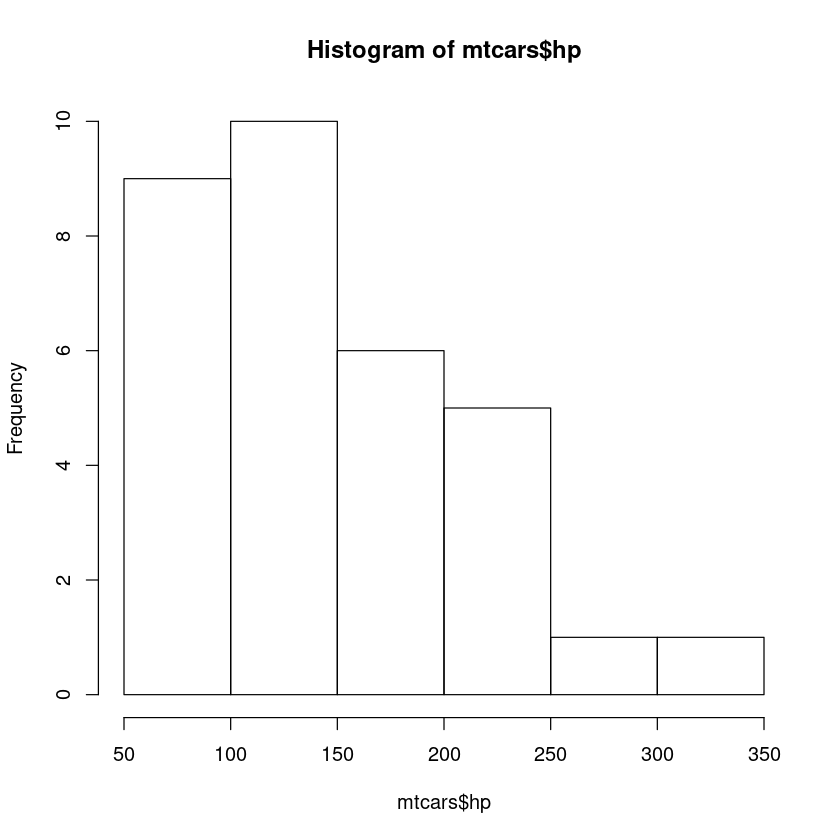

In [3]:
hist(mtcars$hp)

In [4]:
table(mtcars$hp)


 52  62  65  66  91  93  95  97 105 109 110 113 123 150 175 180 205 215 230 245 
  1   1   1   2   1   1   1   1   1   1   3   1   2   2   3   3   1   1   1   2 
264 335 
  1   1 

In [5]:
max(table(mtcars$hp))

[1] 3

In [6]:
bob <- table(mtcars$hp)
mv <- max(bob)
bob[bob==3]


110 175 180 
  3   3   3 

Summary is a good way to get a quick look at your data

In [7]:
summary(mtcars$hp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   52.0    96.5   123.0   146.7   180.0   335.0 

The function kmeans will put the data in to a number of clusters. For the mtcars, I picked 5 buckets. The buckets are selected with a center value, and used to optimize the square error. Don't worry about the theory. This returns lots of good stuff about the data.

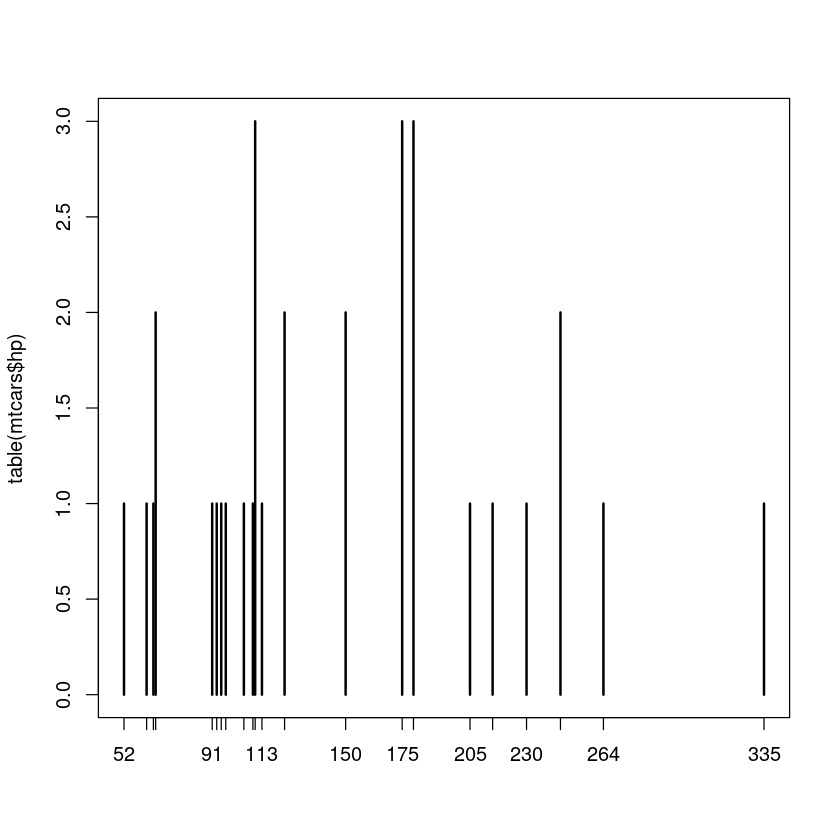

In [8]:
plot(table(mtcars$hp))

In [9]:
length(mtcars$hp)
print(unlist(mtcars$hp))
jack <- kmeans(unlist(mtcars$hp),5)
jack

[1] 32

 [1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109


K-means clustering with 5 clusters of sizes 12, 8, 5, 2, 5

Cluster means:
      [,1]
1 106.5833
2 185.6250
3 263.8000
4 150.0000
5  62.2000

Clustering vector:
 [1] 1 1 1 1 2 1 3 5 1 1 1 2 2 2 2 2 3 5 5 5 1 4 4 3 2 5 1 1 3 2 3 1

Within cluster sum of squares by cluster:
[1] 1276.917 1671.875 6918.800    0.000  140.800
 (between_SS / total_SS =  93.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [10]:
str(jack)

List of 9
 $ cluster     : int [1:32] 1 1 1 1 2 1 3 5 1 1 ...
 $ centers     : num [1:5, 1] 106.6 185.6 263.8 150 62.2
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 145727
 $ withinss    : num [1:5] 1277 1672 6919 0 141
 $ tot.withinss: num 10008
 $ betweenss   : num 135718
 $ size        : int [1:5] 12 8 5 2 5
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Cluster 5 is the largest This can be examined by looking at the original data:

In [11]:
mtcars$hp[jack$cluster==5]

[1] 62 66 52 65 66

The natural cluster is a group of cars with about 100 hourse power (cluster center about 106hp). Many times, a better data understanding can be obtained by looking at these clusters. If you have factor data, convert it to numeric first. 

The next largest cluster is centered around 178 hp, and has two fewer members.

In [12]:
mtcars$hp[jack$cluster==4]

[1] 150 150

Lets look at what the car types and manufactures tell us about these clusters.  First a reminder that row.names will return the row names of the data.frame. This data frame has row names. Not all of them do.

In [13]:
row.names(mtcars)

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

In [14]:
row.names(mtcars)[jack$cluster==4]

[1] "Dodge Challenger" "AMC Javelin"

All American large cars, or foreign luxury cars. 

In [15]:
row.names(mtcars)[jack$cluster==2]

[1] "Hornet Sportabout"   "Merc 450SE"          "Merc 450SL"         
[4] "Merc 450SLC"         "Cadillac Fleetwood"  "Lincoln Continental"
[7] "Pontiac Firebird"    "Ferrari Dino"

All smaller cars. They have smaller engines. 

The clustering found something in the data :-)

The attitude dataset is a set of answers to HR questions in a company. It is in response to how the company does in 7 areas, and an overall company rating.

In [16]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


The company wants to know how people feel about raises. We will form 5 clusters on the data and see where they fall.

In [17]:
summary(attitude$raises)
clu <- kmeans(attitude$raises,5)
str(clu)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43.00   58.25   63.50   64.63   71.00   88.00 

List of 9
 $ cluster     : int [1:30] 4 4 5 2 1 2 1 1 1 4 ...
 $ centers     : num [1:5, 1] 68.3 56.3 48 62.4 79.1
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 3135
 $ withinss    : num [1:5] 33.3 31.4 38 13.7 110.9
 $ tot.withinss: num 227
 $ betweenss   : num 2908
 $ size        : int [1:5] 6 7 3 7 7
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 10.39723

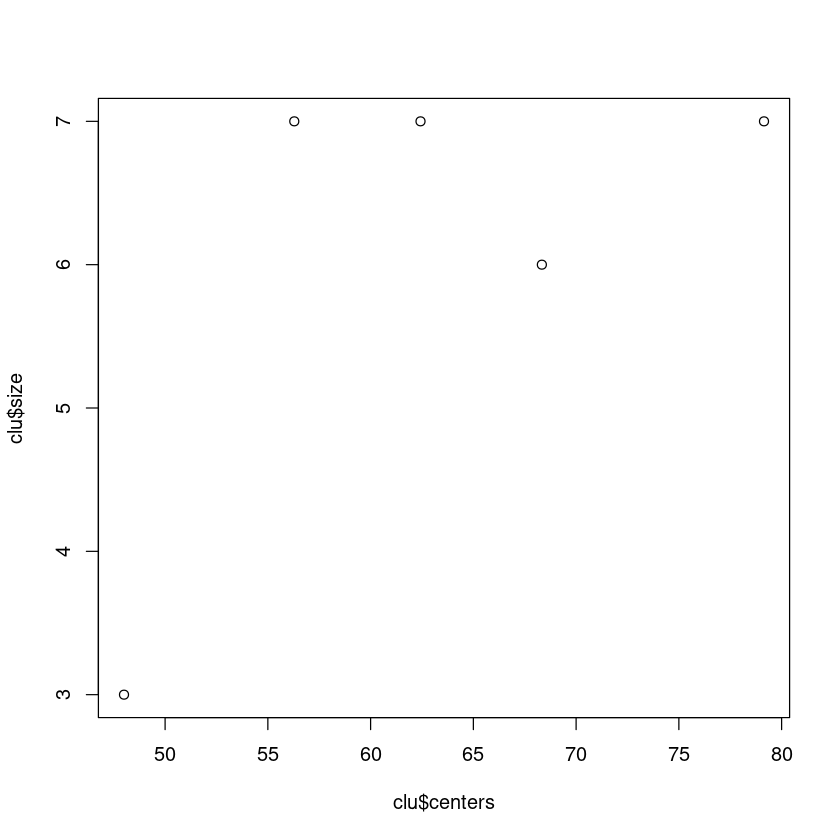

In [18]:
plot(clu$centers,clu$size)
sd(attitude$raises)

Most of the responses are at about 60, but there is a large cluster at 50 and 80.

A clustering (kmeans) is a good way to see how the data is grouped. Compare a simple histogram

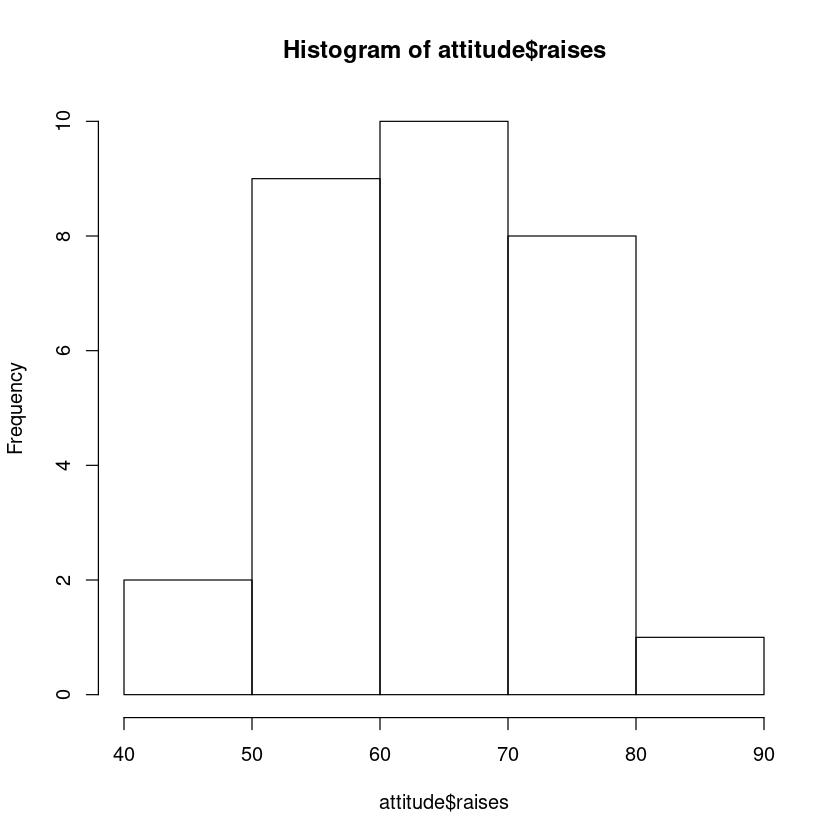

In [19]:
hist(attitude$raises)

The bulk of the responses are between 50 and 70, but there are natural clusters at 60 and 70. Managers will see this type of chart, and feel that the bulk of the company is happy with the raises.

Another view indicates how many are less than 60%

In [20]:
length(attitude$raises[attitude$raises < 60])
length(attitude$raises)

[1] 10

[1] 30

That's 1/3 of the company

A correlation of the data doesn't tell much. Only overall rating and handling complaints have a correlation > 0.8

In [21]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


Take a look at learning in the company

In [22]:
lrn <- kmeans(attitude$learning,5)
str(lrn)

List of 9
 $ cluster     : int [1:30] 2 4 3 5 3 5 4 4 3 5 ...
 $ centers     : num [1:5, 1] 60 38.5 70.6 55.2 46.6
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 3995
 $ withinss    : num [1:5] 22 33 74.2 6.8 25.7
 $ tot.withinss: num 162
 $ betweenss   : num 3833
 $ size        : int [1:5] 5 4 9 5 7
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


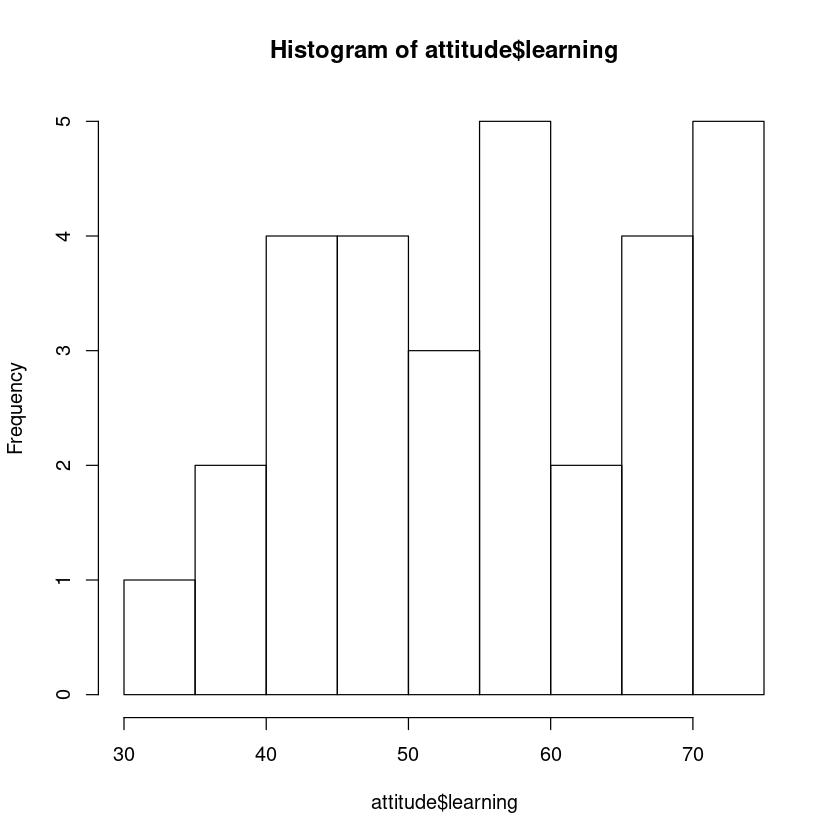

In [23]:
hist(attitude$learning)

It's centered pretty low. Not a great company to learn thing.

Check for natural clusters using kmeans

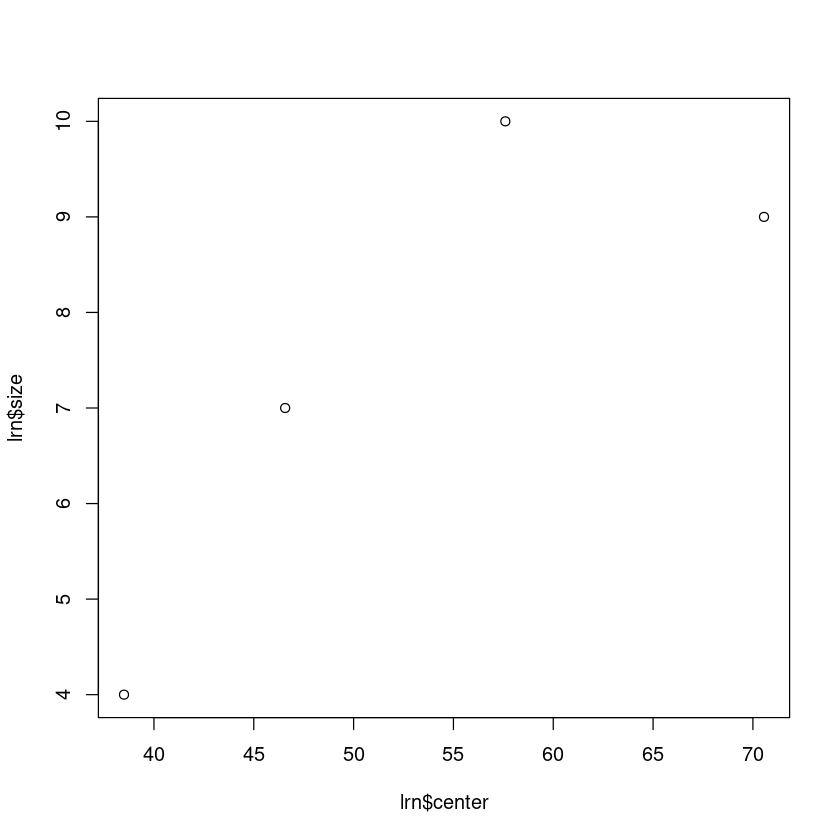

In [24]:
lrn <- kmeans(attitude$learning,4)
plot(lrn$center,lrn$size)

This show the biggest cluster around 60%, and another group around 70% 

Grab the physc admit data, and place it in a data.frame.

Lets do some clustering to see if anything shows up.

In [2]:
load("../engr122/35037-0001-Data.rda")
physc <- da35037.0001
str(physc$AGE)
levels(physc$AGE)


 Factor w/ 11 levels "(2) 12-14","(3) 15-17",..: 10 7 7 10 8 10 3 2 7 9 ...


[1] "(2) 12-14"        "(3) 15-17"        "(4) 18-20"        "(5) 21-24"       
 [5] "(6) 25-29"        "(7) 30-34"        "(8) 35-39"        "(9) 40-44"       
 [9] "(10) 45-49"       "(11) 50-54"       "(12) 55 AND OVER"

First, I'll look at the age distribution with a simple plot. (Remember the data is in a factor, and not the actual age)

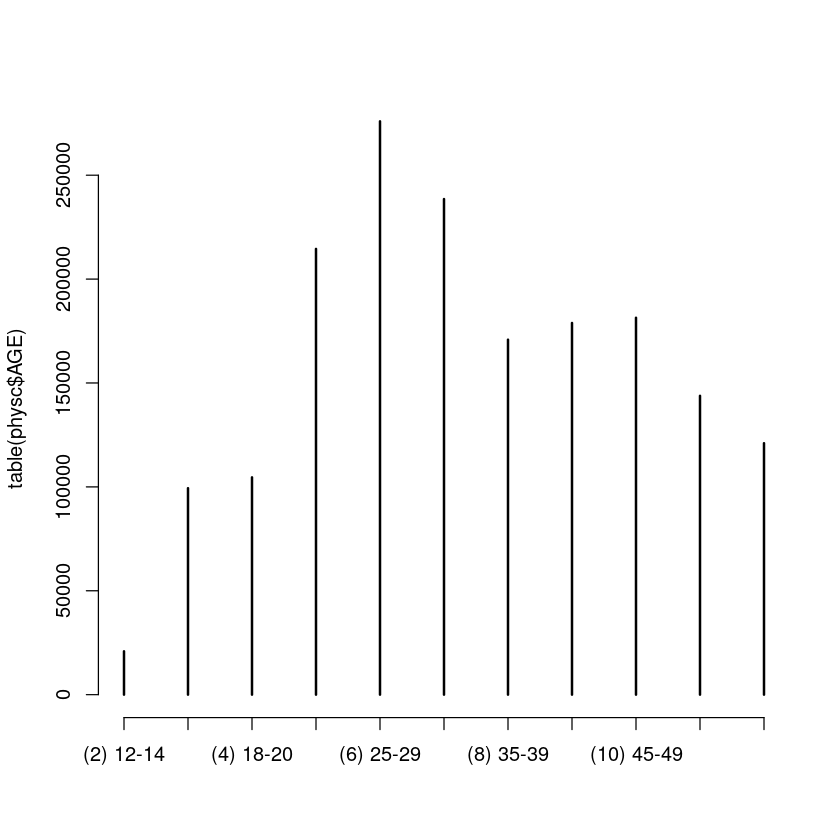

In [27]:
plot(table(physc$AGE))

print the names in the data.frame to find another col to work on.

In [28]:
names(physc)

[1] "CASEID"   "YEAR"     "AGE"      "GENDER"   "RACE"     "ETHNIC"  
 [7] "MARSTAT"  "EDUC"     "EMPLOY"   "DETNLF"   "PREG"     "VET"     
[13] "LIVARAG"  "PRIMINC"  "ARRESTS"  "STFIPS"   "CBSA"     "PMSA"    
[19] "REGION"   "DIVISION" "SERVSETA" "METHUSE"  "DAYWAIT"  "PSOURCE" 
[25] "DETCRIM"  "NOPRIOR"  "SUB1"     "ROUTE1"   "FREQ1"    "FRSTUSE1"
[31] "SUB2"     "ROUTE2"   "FREQ2"    "FRSTUSE2" "SUB3"     "ROUTE3"  
[37] "FREQ3"    "FRSTUSE3" "NUMSUBS"  "IDU"      "ALCFLG"   "COKEFLG" 
[43] "MARFLG"   "HERFLG"   "METHFLG"  "OPSYNFLG" "PCPFLG"   "HALLFLG" 
[49] "MTHAMFLG" "AMPHFLG"  "STIMFLG"  "BENZFLG"  "TRNQFLG"  "BARBFLG" 
[55] "SEDHPFLG" "INHFLG"   "OTCFLG"   "OTHERFLG" "ALCDRUG"  "DSMCRIT" 
[61] "PSYPROB"  "HLTHINS"  "PRIMPAY"

There is a meth flag, and that is a question to ask. Are there age groupings of meth users?
Check out the levels (factor strings in a factor)

In [29]:
levels(physc$METHFLG)

[1] "(0) SUBSTANCE NOT REPORTED" "(1) SUBSTANCE REPORTED"

The data is labeled 0. The (0) is not the factor value, but an assumed coding value. Whey they converted the data to a factor it will change. We know factors start at 1... This can be done with a simple subtract, or just know they will be 1 and 2

In [30]:
head(physc$METHFLG)

[1] (0) SUBSTANCE NOT REPORTED (0) SUBSTANCE NOT REPORTED
[3] (0) SUBSTANCE NOT REPORTED (0) SUBSTANCE NOT REPORTED
[5] (0) SUBSTANCE NOT REPORTED (0) SUBSTANCE NOT REPORTED
Levels: (0) SUBSTANCE NOT REPORTED (1) SUBSTANCE REPORTED

In [31]:
# Subtract 1 to get 0 as not reported, and 1 as reported
# create a m atrix of age and methflg for clustering with both variables
# This allows creating clusters of more than one term
bob <- matrix( c(as.numeric(physc$AGE),as.numeric(physc$METHFLG))-1,ncol=2)

In [32]:
head(bob)

9,0
6,0
6,0
9,0
7,0
9,0


In [33]:
tail(as.numeric(physc$AGE))

[1] 7 7 7 3 3 6

Perform a kmeans clustering on the two columns of data (age and methflg). There are 11 age categories, so I will ask for 11 clusters. You could do fewer, but I want to see where they will fall naturally and the age categories are already pretty broad.

In [34]:
am <- kmeans(bob,11)

In [35]:
# str shows what is in the kmeans result. (it is a list of lists, the first list has names)
str(am)

List of 9
 $ cluster     : int [1:1749767] 10 4 4 10 2 10 3 11 4 2 ...
 $ centers     : num [1:11, 1:2] 9.52 7.5 2 5.42 3.64 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 11738224
 $ withinss    : num [1:11] 419 92015 0 103342 1048 ...
 $ tot.withinss: num 381799
 $ betweenss   : num 11356425
 $ size        : int [1:11] 1678 360279 104212 409364 4552 485902 7 20864 456 263165 ...
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


The centers show where the clusters are located (the center value of the cluster), and the size shows how many samples are in that cluster.

Now take a look at the clusters. I am looking for ones with the flag 1 (I subtracted one to make zero be no methflg, and 1 be a methflg). Our input matrix had age as the first column, and methflg as the second column. The centers will be listed the same way.


In [36]:
am$centers

1,9.519666,1.000000000
2,7.503493,0.005440228
3,2.000000,0.000000000
4,5.417340,0.009365748
5,3.640817,1.000000000
6,3.561860,0.000000000
7,0.000000,1.000000000
8,0.000000,0.000000000
9,1.824561,1.000000000
10,9.456531,0.000000000
11,1.000000,0.000000000


Get just the clusters that show high meth use. Remember that the centers are a list of lists, or two dimensional, so from above, the methflg is the second col.

In [37]:
cmeth <- am$centers[am$centers[,2]>0.9,]
print(class(cmeth))
print(cmeth)

[1] "matrix"
      [,1] [,2]
1 9.519666    1
5 3.640817    1
7 0.000000    1
9 1.824561    1


The selected row name stays the same in the resulting matrix. This can help you find the data in the original clustering.

In [38]:
row.names(cmeth)

[1] "1" "5" "7" "9"

The row names are the numbers of the rows in the original centers. The ages are a statistical combination of the factor values.  I'll round them to the nearest integer to get an age category.

In [39]:
levels(physc$AGE)[round(cmeth[,1],0)]

[1] "(11) 50-54" "(5) 21-24"  "(3) 15-17"

Now that we have identified the 'clusters' in the data, it is good to see how many people had the methflg in the original data.

In [40]:
summary(physc$METHFLG)

(0) SUBSTANCE NOT REPORTED     (1) SUBSTANCE REPORTED 
                   1737280                      12487

It's less than 1% of the data, or about 12500 people. This is still a large number of people, but not a significant number of physc admits are flagged.

It's good to check how many of the total reponses are in the clusters.

In [41]:
sum(am$size[as.numeric(row.names(cmeth))])

[1] 6693

The clusters only contain about 80% of the reported people. The other people are in a category where the methflg is reported a very small fraction of the time. Since I subtracted 1 from the meth flag, a zero means no flag, and a one is a flag. Multiplying the sizes by the meth flag result should approximat the entire methflg distribution

In [42]:
print(am$centers[,2])
sum(am$size*am$centers[,2])

          1           2           3           4           5           6 
1.000000000 0.005440228 0.000000000 0.009365748 1.000000000 0.000000000 
          7           8           9          10          11 
1.000000000 0.000000000 1.000000000 0.000000000 0.000000000 


[1] 12487

It matches. 20% of the methflg is scattered in other natural clusters. 

In [43]:
summary(physc$METHUSE)

(1) YES  (2) NO    NA's 
 113412 1558904   77451

In [44]:
names(physc)

[1] "CASEID"   "YEAR"     "AGE"      "GENDER"   "RACE"     "ETHNIC"  
 [7] "MARSTAT"  "EDUC"     "EMPLOY"   "DETNLF"   "PREG"     "VET"     
[13] "LIVARAG"  "PRIMINC"  "ARRESTS"  "STFIPS"   "CBSA"     "PMSA"    
[19] "REGION"   "DIVISION" "SERVSETA" "METHUSE"  "DAYWAIT"  "PSOURCE" 
[25] "DETCRIM"  "NOPRIOR"  "SUB1"     "ROUTE1"   "FREQ1"    "FRSTUSE1"
[31] "SUB2"     "ROUTE2"   "FREQ2"    "FRSTUSE2" "SUB3"     "ROUTE3"  
[37] "FREQ3"    "FRSTUSE3" "NUMSUBS"  "IDU"      "ALCFLG"   "COKEFLG" 
[43] "MARFLG"   "HERFLG"   "METHFLG"  "OPSYNFLG" "PCPFLG"   "HALLFLG" 
[49] "MTHAMFLG" "AMPHFLG"  "STIMFLG"  "BENZFLG"  "TRNQFLG"  "BARBFLG" 
[55] "SEDHPFLG" "INHFLG"   "OTCFLG"   "OTHERFLG" "ALCDRUG"  "DSMCRIT" 
[61] "PSYPROB"  "HLTHINS"  "PRIMPAY"

In [45]:
summary(physc$PREG)

(1) YES  (2) NO    NA's 
  21926  529485 1198356

In [46]:
preg <- physc[!is.na(physc$PREG),]

In [47]:
summary(preg$PREG)

(1) YES  (2) NO 
  21926  529485

In [48]:
summary(preg$AGE)

(2) 12-14        (3) 15-17        (4) 18-20        (5) 21-24 
            6885            25775            31394            74484 
       (6) 25-29        (7) 30-34        (8) 35-39        (9) 40-44 
          101924            84617            56202            54471 
      (10) 45-49       (11) 50-54 (12) 55 AND OVER 
           50771            37577            27311

In [54]:
mx2 <- matrix( c(as.numeric(preg$AGE),as.numeric(preg$PREG)),ncol=2)

In [55]:
str(mx2)

 num [1:551411, 1:2] 2 9 6 5 6 9 5 9 5 10 ...


In [56]:
clp <- kmeans(mx2,11)
clp

K-means clustering with 11 clusters of sizes 54471, 159, 50771, 170327, 5372, 27237, 37492, 55100, 8150, 135447, 6885

Cluster means:
        [,1]     [,2]
1   8.000000 1.991427
2  10.465409 1.000000
3   9.000000 1.997006
4   4.598402 1.959049
5   6.258563 1.000000
6  11.000000 2.000000
7  10.000000 2.000000
8   2.532214 1.989310
9   3.746135 1.000000
10  6.404682 2.000000
11  1.000000 1.990995

Clustering vector:
    [1]  8  3 10  4 10  3  4  3  4  7  1  1  1 10  7  4  1  4  4  1  8  4  3  7
   [25]  1  6 10  3 10  4  1  4  4  4  4 10 10  4  3  9  4  8  8  4  8  4  1  6
 ' ' ' ' ' ' ' '  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '  
[99913]  1  7  4  4  4 10  4  1  8  6  4  4  4  1  4  8  8 10  4 10  4 10  3 10
[99937]  8 10 10  4  1  5  6  7  4 10  8  3 10  4  4 10  8  8  1  3  7  3  4  1
[99961]  8  4  1  7  4  8  4  1 10  4  3  4  9 10  7  8  1  8  4  8  4  4  7 10
[99985]  7  1  4 11 10 10 10  4  4  4  1  4  6  8  4
 [ reached getOption("max.print") -- omitted 4514

In [52]:
str(physc)

'data.frame':	1749767 obs. of  63 variables:
 $ CASEID  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ YEAR    : num  2012 2012 2012 2012 2012 ...
  ..- attr(*, "value.labels")= Named num 
  .. ..- attr(*, "names")= chr 
 $ AGE     : Factor w/ 11 levels "(2) 12-14","(3) 15-17",..: 10 7 7 10 8 10 3 2 7 9 ...
 $ GENDER  : Factor w/ 2 levels "(1) MALE","(2) FEMALE": 1 1 1 1 1 1 1 2 1 2 ...
 $ RACE    : Factor w/ 9 levels "(1) ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)",..: 7 5 5 5 5 4 5 5 5 4 ...
 $ ETHNIC  : Factor w/ 6 levels "(1) PUERTO RICAN",..: 2 5 5 5 5 5 5 5 5 5 ...
 $ MARSTAT : Factor w/ 4 levels "(1) NEVER MARRIED",..: 4 1 1 4 3 2 1 1 4 1 ...
 $ EDUC    : Factor w/ 5 levels "(1) 8 YEARS OR LESS",..: 1 4 4 5 3 2 2 2 3 2 ...
 $ EMPLOY  : Factor w/ 4 levels "(1) FULL TIME",..: 1 4 3 3 3 3 1 4 3 3 ...
 $ DETNLF  : Factor w/ 5 levels "(1) HOMEMAKER",..: NA 3 NA NA NA NA NA 2 NA NA ...
 $ PREG    : Factor w/ 2 levels "(1) YES","(2) NO": NA NA NA NA NA NA NA 2 NA 2 ...
 $ VET     : Factor w/ 2 levels "

 Factor w/ 11 levels "(2) 12-14","(3) 15-17",..: 10 7 7 10 8 10 3 2 7 9 ...


[1] "(2) 12-14"        "(3) 15-17"        "(4) 18-20"        "(5) 21-24"       
 [5] "(6) 25-29"        "(7) 30-34"        "(8) 35-39"        "(9) 40-44"       
 [9] "(10) 45-49"       "(11) 50-54"       "(12) 55 AND OVER"

[1] "factor"

(1) HOMELESS   (2) DEPENDENT LIVING (3) INDEPENDENT LIVING 
                233643                 358708                1133005

(1) MALE (2) FEMALE 
   1149463     575893

(2) 12-14        (3) 15-17        (4) 18-20        (5) 21-24 
           20644            97901           103108           211370 
       (6) 25-29        (7) 30-34        (8) 35-39        (9) 40-44 
          271932           234929           168404           176514 
      (10) 45-49       (11) 50-54 (12) 55 AND OVER 
          179015           141975           119564

In [10]:
#Checking if ther are any junk values. like NA so that we can clean the data.
head(physc$GENDER)

[1] (1) MALE (1) MALE (1) MALE (1) MALE (1) MALE (1) MALE
Levels: (1) MALE (2) FEMALE

In [44]:
cluster <- matrix( c(as.numeric(livarg$AGE),as.numeric(livarg$GENDER),as.numeric(livarg$LIVARAG)),ncol=3)
head(cluster)
summary(cluster)

10,1,3
7,1,3
10,1,3
8,1,3
10,1,3
3,1,2


       V1              V2              V3       
 Min.   : 1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.:2.000  
 Median : 6.00   Median :1.000   Median :3.000  
 Mean   : 6.42   Mean   :1.334   Mean   :2.521  
 3rd Qu.: 9.00   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :11.00   Max.   :2.000   Max.   :3.000  

In [45]:
# str shows what is in the kmeans result. (it is a list of lists, the first list has names)
res <- kmeans(cluster,5)
str(res)

List of 9
 $ cluster     : int [1:1725356] 1 2 1 1 1 4 2 1 1 2 ...
 $ centers     : num [1:5, 1:3] 9.33 6.41 5.57 3.13 5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 12850746
 $ withinss    : num [1:5] 1252787 219948 138148 572807 97207
 $ tot.withinss: num 2280897
 $ betweenss   : num 10569850
 $ size        : int [1:5] 617068 348605 104272 413175 242236
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [47]:
length(res$center)
length(res$size)
print(res$center[1])
ncol(res$center)
nrow(res$center)

#colnames(res$center) <- paste('v', 1:3,sep="")
#res[,'v1']
plot(res$center,res$size)

[1] 15

[1] 5

[1] 9.33155


[1] 3

[1] 5

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ
